In [145]:
import pandas as pd
from sklearn.datasets import load_iris

In [146]:
iris=load_iris()

In [147]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [148]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [149]:
df=pd.DataFrame(iris.data,columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [150]:
df=df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [151]:
from matplotlib import pyplot as plt
%matplotlib inline

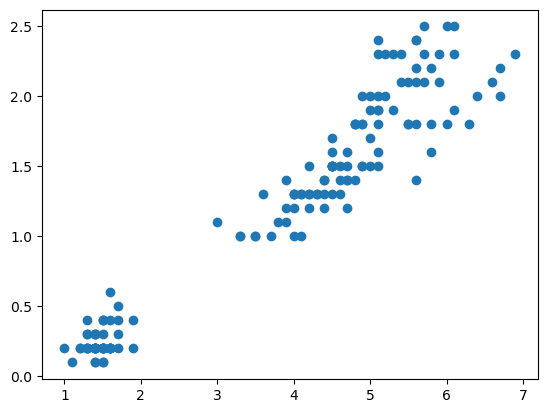

In [152]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [153]:
from sklearn.cluster import KMeans 

In [154]:
km=KMeans(n_clusters=4)

In [155]:
y_predict=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3])

In [156]:
df['clusters']=y_predict
df

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,3
147,5.2,2.0,1
148,5.4,2.3,1


In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [158]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,3
147,0.711864,0.791667,1
148,0.745763,0.916667,1


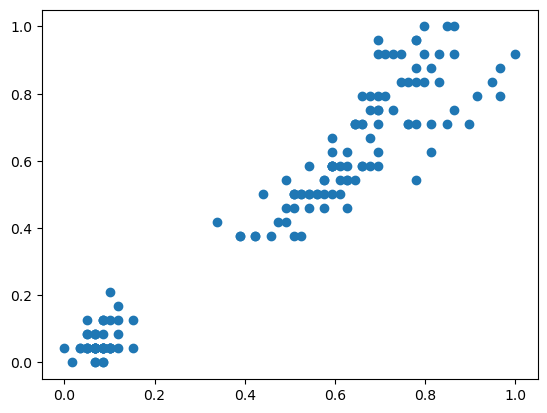

In [159]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [160]:
df0=df[df['clusters']==0]
df1=df[df['clusters']==1]
df2=df[df['clusters']==2]
df3=df[df['clusters']==3]

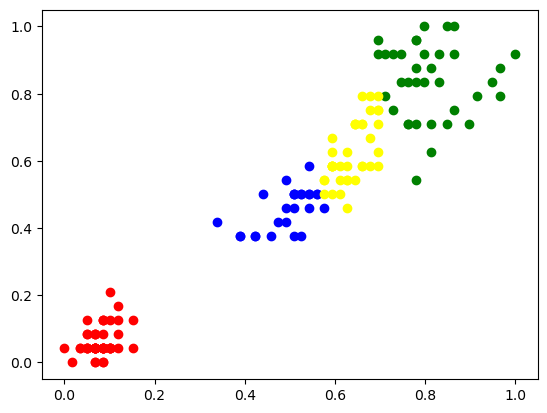

In [161]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='yellow')



In [162]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.78611111, 2.10833333],
       [3.90384615, 1.19230769],
       [4.75789474, 1.59736842]])

In [163]:
km=KMeans(n_clusters=4)
y_predict=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [164]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.53430186, 0.4890873 ],
       [0.82234777, 0.88425926],
       [0.695462  , 0.68548387]])

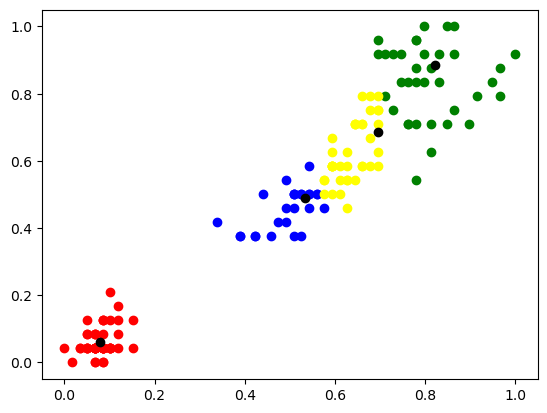

In [166]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black')

In [167]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

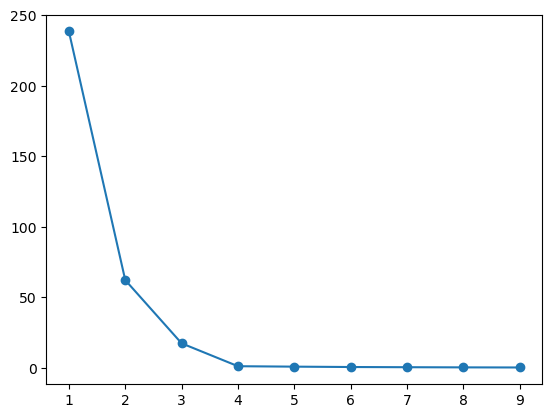

In [170]:
plt.scatter(k_rng,sse)
plt.plot(k_rng,sse)